# **Polynomial Regression**

The relationship between the independent variable x and dependent variable y is modeled as an nth-degree polynomial in polynomial regression, which is a type of linear regression. In polynomial regression, a nonlinear relationship is fit between the value of x and the corresponding conditional mean of y, denoted E(y | x). <br><br>
The general form of a polynomial regression equation of degree n is:<br>
`y= b0+b1x + b2x2+ b3x3+....+ bnxn`

In [1]:
import numpy as np

class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def transform(self, X):
        n_samples, n_features = X.shape
        X_poly = np.ones((n_samples, 1))
        for d in range(1, self.degree + 1):
            for i in range(n_features):
                X_poly = np.hstack((X_poly, np.power(X[:, i], d).reshape(-1, 1)))
        return X_poly

class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, n_iterations=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        poly = PolynomialFeatures(self.degree)
        X_poly = poly.transform(X)
        n_samples, n_features = X_poly.shape

        # Initialize weights
        self.weights = np.zeros(n_features)

        # Gradient Descent
        for _ in range(self.n_iterations):
            y_predicted = np.dot(X_poly, self.weights)

            # Calculate gradients
            dw = (1 / n_samples) * np.dot(X_poly.T, (y_predicted - y.ravel()))
            # Update weights
            self.weights -= self.learning_rate * dw

    def predict(self, X):
        poly = PolynomialFeatures(self.degree)
        X_poly = poly.transform(X)
        return np.dot(X_poly, self.weights)

Mean Squared Error: 0.6402300511730965


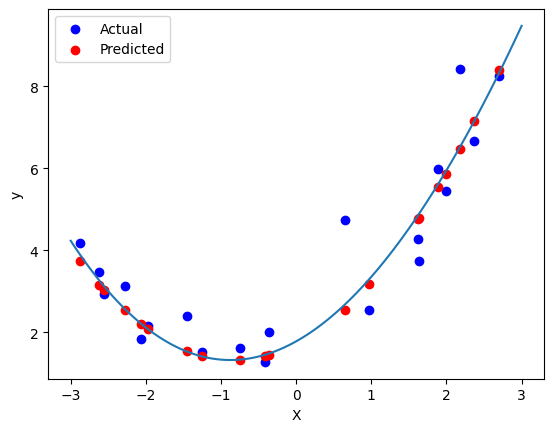

In [7]:
# testing working by Generating a dataset
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    import matplotlib.pyplot as plt
    import numpy as np

    # dataset for polynomial regression
    np.random.seed(42)
    X = 6 * np.random.rand(100, 1) - 3
    y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    regressor = PolynomialRegression(degree=2, learning_rate=0.01, n_iterations=1000)
    regressor.fit(X_train, y_train)

    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse}')

    mymodel = np.poly1d(np.polyfit(X.ravel(), y.ravel(), 3))
    myline = np.linspace(-3, 3, 100)
    plt.plot(myline, mymodel(myline))
    plt.scatter(X_test, y_test, color='blue', label='Actual')
    plt.scatter(X_test, predictions, color='red', label='Predicted')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()